In [106]:
import pandas as pd 
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.preprocessing import LabelEncoder

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz


In [107]:
df_availability = pd.read_csv('availability.csv')
df_station = pd.read_csv('station.csv')

In [108]:
df_merged_station = pd.merge(df_availability, df_station, on='number')

In [109]:
# contains all the data from station and availablity 
df_merged_station

,number,available_bike_stands,available_bikes,status,last_update,name,address,position_lat,position_lng,banking,bonus,bike_stands
0,1,31,0,OPEN,1677187046,CLARENDON ROW,Clarendon Row,53.340927,-6.262501,0,0,31
1,1,31,0,OPEN,1677187677,CLARENDON ROW,Clarendon Row,53.340927,-6.262501,0,0,31
2,1,31,0,OPEN,1677188283,CLARENDON ROW,Clarendon Row,53.340927,-6.262501,0,0,31
3,1,31,0,OPEN,1677188889,CLARENDON ROW,Clarendon Row,53.340927,-6.262501,0,0,31
4,1,31,0,OPEN,1677189497,CLARENDON ROW,Clarendon Row,53.340927,-6.262501,0,0,31
...,...,...,...,...,...,...,...,...,...,...,...,...
725882,117,33,7,OPEN,1680553203,HANOVER QUAY EAST,Hanover Quay East,53.343653,-6.231755,0,0,40
725883,117,33,7,OPEN,1680553809,HANOVER QUAY EAST,Hanover Quay East,53.343653,-6.231755,0,0,40
725884,117,31,9,OPEN,1680554324,HANOVER QUAY EAST,Hanover Quay East,53.343653,-6.231755,0,0,40
725885,117,31,9,OPEN,1680554930,HANOVER QUAY EAST,Hanover Quay East,53.343653,-6.231755,0,0,40


In [110]:
df_weather = pd.read_csv("weather.csv")


In [111]:
df_weather

,updatedTime,weatherId,weatherMain,temp,feels_like,temp_min,temp_max,humidity,visibility,windSpeed,windDeg,sunrise,sunset
0,1677187426,803,Clouds,280.24,277.04,279.50,280.92,84,10000,5.14,270,1677137238,1677174596
1,1677189259,803,Clouds,280.33,277.15,279.52,280.94,84,10000,5.14,270,1677137238,1677174598
2,1677190958,803,Clouds,280.26,277.29,279.52,280.94,85,10000,4.63,280,1677137238,1677174598
3,1677192959,803,Clouds,280.13,277.13,279.52,280.38,84,10000,4.63,270,1677137238,1677174598
4,1677194582,803,Clouds,280.13,276.90,279.52,280.38,84,10000,5.14,270,1677137238,1677174598
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1867,1680548144,803,Clouds,282.11,279.82,281.52,282.68,79,10000,4.12,140,1680501271,1680548519
1868,1680550073,803,Clouds,281.45,279.56,280.93,281.71,78,10000,3.09,130,1680501270,1680548518
1869,1680551927,803,Clouds,280.45,278.36,280.00,281.68,81,10000,3.09,140,1680501271,1680548519
1870,1680553328,803,Clouds,279.99,277.81,279.44,280.58,84,10000,3.09,150,1680501271,1680548519


In [112]:
df_merged_station = df_merged_station.sort_values("last_update")
df_weather= df_weather.sort_values("updatedTime")


In [113]:

df = pd.merge_asof(df_merged_station, df_weather, left_on="last_update", right_on="updatedTime", direction="nearest")

In [114]:
df['updatedTime']

0         1677187426
1         1677187426
2         1677187426
3         1677187426
4         1677187426
             ...    
725882    1680555534
725883    1680555534
725884    1680555534
725885    1680555534
725886    1680555534
Name: updatedTime, Length: 725887, dtype: int64

In [115]:
# change interget to real time 
# df["last_update"] = pd.to_datetime(df['last_update'], unit='s')
# df
df

,number,available_bike_stands,available_bikes,status,last_update,name,address,position_lat,position_lng,banking,...,temp,feels_like,temp_min,temp_max,humidity,visibility,windSpeed,windDeg,sunrise,sunset
0,507,0,1,OPEN,1675786128,ORIEL STREET TEST TERMINAL,"JCDecaux Ireland, 52 Oriel Street Lower, Dublin 1",53.354630,-6.242615,0,...,280.24,277.04,279.50,280.92,84,10000,5.14,270,1677137238,1677174596
1,14,24,6,OPEN,1677186564,FOWNES STREET UPPER,Fownes Street Upper,53.344603,-6.263371,0,...,280.24,277.04,279.50,280.92,84,10000,5.14,270,1677137238,1677174596
2,101,12,18,OPEN,1677186564,KING STREET NORTH,King Street North,53.350291,-6.273507,0,...,280.24,277.04,279.50,280.92,84,10000,5.14,270,1677137238,1677174596
3,50,25,15,OPEN,1677186569,GEORGES LANE,George's Lane,53.350230,-6.279696,0,...,280.24,277.04,279.50,280.92,84,10000,5.14,270,1677137238,1677174596
4,99,23,7,OPEN,1677186570,CITY QUAY,City Quay,53.346637,-6.246154,0,...,280.24,277.04,279.50,280.92,84,10000,5.14,270,1677137238,1677174596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725882,87,35,3,OPEN,1680554939,COLLINS BARRACKS MUSEUM,Collins Barracks Museum,53.347477,-6.285250,0,...,279.85,277.93,279.44,280.52,84,10000,2.68,150,1680501271,1680548519
725883,34,0,30,OPEN,1680554940,PORTOBELLO HARBOUR,Portobello Harbour,53.330362,-6.265163,0,...,279.85,277.93,279.44,280.52,84,10000,2.68,150,1680501271,1680548519
725884,25,11,19,OPEN,1680554967,MERRION SQUARE EAST,Merrion Square East,53.339434,-6.246548,0,...,279.85,277.93,279.44,280.52,84,10000,2.68,150,1680501271,1680548519
725885,96,26,4,OPEN,1680554976,KILMAINHAM LANE,Kilmainham Lane,53.341805,-6.305085,0,...,279.85,277.93,279.44,280.52,84,10000,2.68,150,1680501271,1680548519


In [119]:
df_4 = df.loc[df['number']== 4]


In [120]:
df_4

,number,available_bike_stands,available_bikes,status,last_update,name,address,position_lat,position_lng,banking,...,temp,feels_like,temp_min,temp_max,humidity,visibility,windSpeed,windDeg,sunrise,sunset
113,4,17,3,OPEN,1677187168,GREEK STREET,Greek Street,53.346874,-6.272976,0,...,280.24,277.04,279.50,280.92,84,10000,5.14,270,1677137238,1677174596
243,4,17,3,OPEN,1677187775,GREEK STREET,Greek Street,53.346874,-6.272976,0,...,280.24,277.04,279.50,280.92,84,10000,5.14,270,1677137238,1677174596
374,4,17,3,OPEN,1677188381,GREEK STREET,Greek Street,53.346874,-6.272976,0,...,280.33,277.15,279.52,280.94,84,10000,5.14,270,1677137238,1677174598
508,4,17,3,OPEN,1677188988,GREEK STREET,Greek Street,53.346874,-6.272976,0,...,280.33,277.15,279.52,280.94,84,10000,5.14,270,1677137238,1677174598
636,4,17,3,OPEN,1677189594,GREEK STREET,Greek Street,53.346874,-6.272976,0,...,280.33,277.15,279.52,280.94,84,10000,5.14,270,1677137238,1677174598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725284,4,18,2,OPEN,1680552072,GREEK STREET,Greek Street,53.346874,-6.272976,0,...,280.45,278.36,280.00,281.68,81,10000,3.09,140,1680501271,1680548519
725412,4,18,2,OPEN,1680552678,GREEK STREET,Greek Street,53.346874,-6.272976,0,...,279.99,277.81,279.44,280.58,84,10000,3.09,150,1680501271,1680548519
725539,4,18,2,OPEN,1680553283,GREEK STREET,Greek Street,53.346874,-6.272976,0,...,279.99,277.81,279.44,280.58,84,10000,3.09,150,1680501271,1680548519
725661,4,18,2,OPEN,1680553888,GREEK STREET,Greek Street,53.346874,-6.272976,0,...,279.99,277.81,279.44,280.58,84,10000,3.09,150,1680501271,1680548519


In [88]:
df_4.dtypes

number                     int64
available_bike_stands      int64
available_bikes            int64
last_update                int64
position_lat             float64
position_lng             float64
banking                    int64
bonus                      int64
bike_stands                int64
updatedTime                int64
weatherId                  int64
temp                     float64
feels_like               float64
temp_min                 float64
temp_max                 float64
humidity                   int64
visibility                 int64
windSpeed                float64
windDeg                    int64
sunrise                    int64
sunset                     int64
weatherMain_encoded        int64
dtype: object

In [61]:
print(df_4['status'].unique())

df_4 = df_4.drop('status', axis=1)


['OPEN']


cleaning our dataset to be reflective of the consistent types 
I cannot have string => objects 

In [79]:
print(df_4['name'].unique())

df_4 = df_4.drop('name', axis=1)


KeyError: 'name'

In [89]:
print(df_4['address'].unique())

df_4 = df_4.drop('address', axis=1)


KeyError: 'address'

In [ ]:
df_4 = df_4.drop('available_bikes', axis=1)


In [81]:
df_4["weatherMain"] = df["weatherMain"].astype("category")


In [82]:
df_4['weatherMain'].unique()


['Clouds', 'Drizzle', 'Rain', 'Clear', 'Snow', 'Mist', 'Fog']
Categories (7, object): ['Clear', 'Clouds', 'Drizzle', 'Fog', 'Mist', 'Rain', 'Snow']

In [83]:
# encoding weather main 

# create a LabelEncoder object
encoder = LabelEncoder()

# fit and transform the "weatherMain" categorical variable
df_4["weatherMain_encoded"] = encoder.fit_transform(df_4["weatherMain"])

# print the encoded values
print(df_4["weatherMain_encoded"])

# print the mapping between the original categories and their encoded values
print("Mapping between original categories and encoded values:")
for i, category in enumerate(encoder.classes_):
    print(f"{category} -> {i}")


113       1
243       1
374       1
508       1
636       1
         ..
725284    1
725412    1
725539    1
725661    1
725788    1
Name: weatherMain_encoded, Length: 6247, dtype: int64
Mapping between original categories and encoded values:
Clear -> 0
Clouds -> 1
Drizzle -> 2
Fog -> 3
Mist -> 4
Rain -> 5
Snow -> 6


In [84]:
df_4 = df_4.drop("weatherMain", axis=1)


In [85]:
df_4['weatherMain_encoded'].unique()


array([1, 2, 5, 0, 6, 4, 3])

X = OTHER FEATURES
Y = TARGET 

model for available stands

In [91]:
X = df_4.drop('available_bike_stands', axis=1)
Y = df_4['available_bike_stands']

In [92]:
X_train_data, X_test_data, Y_train_data, Y_test_data = train_test_split(X, Y, test_size=0.2)


In [93]:
X_test_data

,number,available_bikes,last_update,position_lat,position_lng,banking,bonus,bike_stands,updatedTime,weatherId,...,feels_like,temp_min,temp_max,humidity,visibility,windSpeed,windDeg,sunrise,sunset,weatherMain_encoded
706132,4,19,1680465441,53.346874,-6.272976,0,0,20,1680465602,802,...,278.09,279.80,280.58,83,10000,3.60,110,1680415016,1680462011,1
604836,4,9,1679999869,53.346874,-6.272976,0,0,20,1679999233,803,...,284.02,283.15,285.70,77,10000,9.77,200,1679983741,1680029470,1
300851,4,5,1678592171,53.346874,-6.272976,0,0,20,1678591434,803,...,278.42,281.43,283.15,86,10000,8.23,240,1678603673,1678645324,1
32445,4,16,1677336045,53.346874,-6.272976,0,0,20,1677336954,803,...,275.32,279.27,280.52,67,10000,7.20,60,1677309771,1677347629,1
304571,4,6,1678611259,53.346874,-6.272976,0,0,20,1678611562,803,...,278.78,281.52,282.91,84,10000,7.72,220,1678603674,1678645325,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338155,4,7,1678769351,53.346874,-6.272976,0,0,20,1678769634,803,...,270.75,274.05,276.49,90,10000,5.14,300,1678776184,1678818344,1
418117,4,19,1679136896,53.346874,-6.272976,0,0,20,1679137074,300,...,284.67,284.54,285.60,82,10000,5.66,230,1679121203,1679164383,2
430326,4,18,1679194902,53.346874,-6.272976,0,0,20,1679194706,803,...,272.81,276.25,277.91,79,10000,6.71,270,1679207458,1679250894,1
477697,4,12,1679415369,53.346874,-6.272976,0,0,20,1679416013,501,...,283.77,283.54,285.16,82,10000,7.72,200,1679379965,1679423910,5


In [94]:
X_train_data

,number,available_bikes,last_update,position_lat,position_lng,banking,bonus,bike_stands,updatedTime,weatherId,...,feels_like,temp_min,temp_max,humidity,visibility,windSpeed,windDeg,sunrise,sunset,weatherMain_encoded
594223,4,6,1679950303,53.346874,-6.272976,0,0,20,1679950243,803,...,277.89,280.00,281.49,75,10000,4.63,150,1679897489,1679942962,1
402828,4,20,1679062474,53.346874,-6.272976,0,0,20,1679062929,803,...,284.93,283.49,286.70,85,10000,5.66,140,1679034949,1679077874,1
286282,4,2,1678520425,53.346874,-6.272976,0,0,20,1678519690,500,...,273.01,275.36,276.68,90,10000,3.09,140,1678517418,1678558814,5
602989,4,18,1679991646,53.346874,-6.272976,0,0,20,1679992053,803,...,278.27,281.52,283.72,84,10000,10.80,190,1679983742,1680029470,1
284279,4,2,1678510352,53.346874,-6.272976,0,0,20,1678510755,500,...,272.32,275.02,278.10,83,10000,4.63,160,1678517417,1678558813,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18264,4,2,1677268404,53.346874,-6.272976,0,0,20,1677268561,801,...,278.49,279.03,281.49,78,10000,4.12,10,1677223505,1677261114,1
104183,4,16,1677680866,53.346874,-6.272976,0,0,20,1677680408,803,...,277.50,280.36,281.14,73,10000,6.17,50,1677654828,1677693689,1
312133,4,7,1678646256,53.346874,-6.272976,0,0,20,1678645466,803,...,284.05,283.72,285.14,86,10000,5.14,200,1678603674,1678645325,1
8846,4,6,1677228955,53.346874,-6.272976,0,0,20,1677229016,803,...,277.96,280.31,281.47,88,10000,4.63,270,1677223505,1677261114,1


In [95]:
Y_train_data

594223    14
402828     0
286282    18
602989     2
284279    18
          ..
18264     18
104183     4
312133    13
8846      14
115899    19
Name: available_bike_stands, Length: 4997, dtype: int64

In [96]:
Y_test_data

706132     1
604836    11
300851    15
32445      4
304571    14
          ..
338155    13
418117     1
430326     1
477697     8
689843     2
Name: available_bike_stands, Length: 1250, dtype: int64

In [97]:
rf = RandomForestClassifier()
rf.fit(X_train_data, Y_train_data)

RandomForestClassifier()

In [98]:
y_pred1 = rf.predict(X_test_data)


In [99]:
accuracy = accuracy_score(Y_test_data, y_pred1)
print("Accuracy:", accuracy)

Accuracy: 0.8536


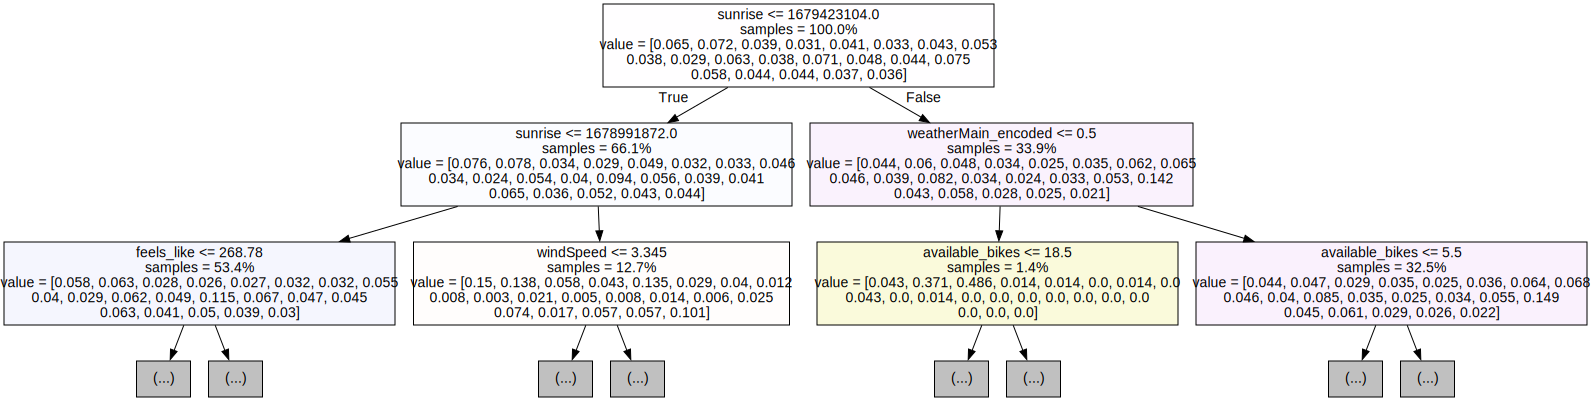

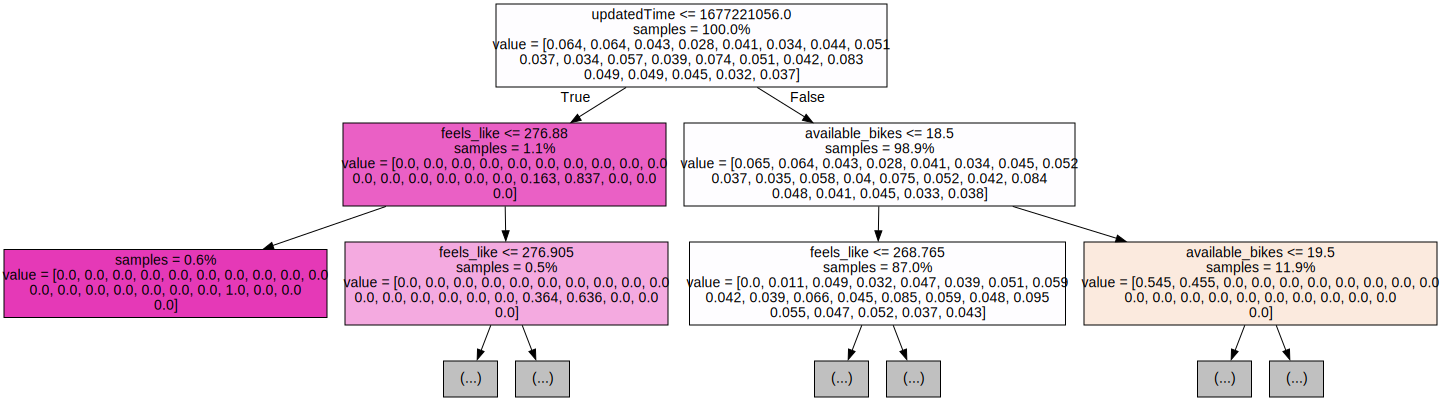

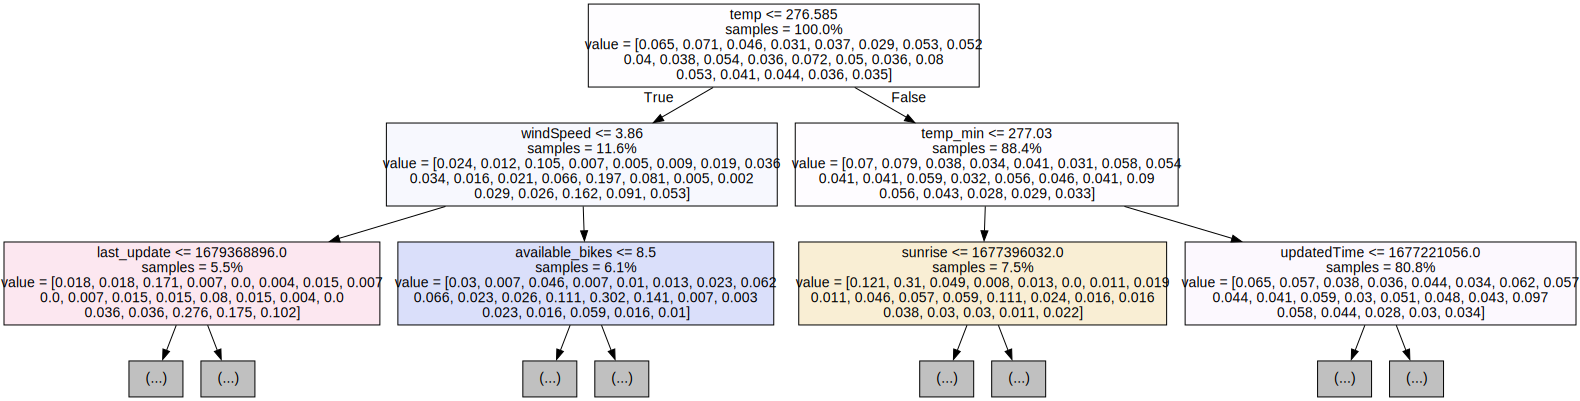

In [100]:

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train_data.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [102]:
# setting hyperparameters 
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search1 = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search1.fit(X_train_data, Y_train_data)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fe459a5c220>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fe459a5e3e0>})

In [103]:
# Create a variable for the best model
best_rf1 = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search1.best_params_)

Best hyperparameters: {'max_depth': 13, 'n_estimators': 250}


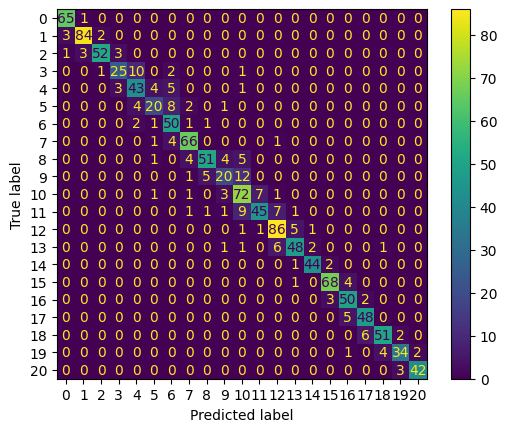

In [104]:
# Generate predictions with the best model
y_pred1 = best_rf1.predict(X_test_data)

# Create the confusion matrix TARGET FEATURE 
cm = confusion_matrix(Y_test_data, y_pred1)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

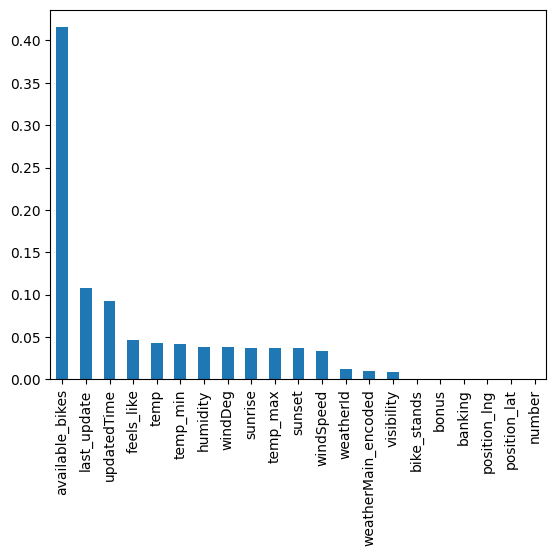

In [105]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf1.feature_importances_, index=X_train_data.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

Model for available bikes 

In [22]:
# Split the data into features (X) and target (y)
X = df_4.drop('available_bikes', axis=1)
Y = df_4['available_bikes']

In [23]:
X_train_data_4, X_test_data_4, Y_train_data_4, Y_test_data_4 = train_test_split(X, Y, test_size=0.2)


In [24]:
X_test_data_4

,number,available_bike_stands,last_update,position_lat,position_lng,banking,bonus,bike_stands,updatedTime,weatherId,...,feels_like,temp_min,temp_max,humidity,visibility,windSpeed,windDeg,sunrise,sunset,weatherMain_encoded
508,4,17,1677188988,53.346874,-6.272976,0,0,20,1677189259,803,...,277.15,279.52,280.94,84,10000,5.14,270,1677137238,1677174598,1
687761,4,5,1680376766,53.346874,-6.272976,0,0,20,1680377283,803,...,278.76,281.52,282.05,91,10000,5.66,320,1680328760,1680375503,1
273315,4,10,1678459445,53.346874,-6.272976,0,0,20,1678460084,802,...,277.37,278.48,279.23,53,10000,2.06,50,1678431162,1678472303,1
60264,4,1,1677470546,53.346874,-6.272976,0,0,20,1677470402,803,...,276.43,277.68,279.83,78,10000,3.60,120,1677482301,1677520660,1
14758,4,13,1677254200,53.346874,-6.272976,0,0,20,1677254246,803,...,283.11,283.47,284.27,75,10000,6.17,340,1677223505,1677261114,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368508,4,12,1678904825,53.346874,-6.272976,0,0,20,1678904975,803,...,279.31,281.42,284.68,90,8000,8.75,190,1678862441,1678904856,1
676619,4,10,1680323416,53.346874,-6.272976,0,0,20,1680323096,500,...,279.81,281.54,283.15,94,10000,4.63,290,1680328759,1680375502,5
388364,4,4,1678993631,53.346874,-6.272976,0,0,20,1678992729,801,...,284.64,284.80,285.68,75,10000,6.17,200,1678948695,1678991365,1
33358,4,6,1677340138,53.346874,-6.272976,0,0,20,1677340481,803,...,275.86,279.44,279.83,66,10000,6.17,50,1677309771,1677347629,1


In [25]:
X_train_data_4

,number,available_bike_stands,last_update,position_lat,position_lng,banking,bonus,bike_stands,updatedTime,weatherId,...,feels_like,temp_min,temp_max,humidity,visibility,windSpeed,windDeg,sunrise,sunset,weatherMain_encoded
693175,4,1,1680403931,53.346874,-6.272976,0,0,20,1680404302,804,...,279.40,281.11,281.68,87,10000,3.09,320,1680415016,1680462011,1
557921,4,10,1679779129,53.346874,-6.272976,0,0,20,1679779630,803,...,279.65,279.03,282.05,84,10000,1.54,0,1679724981,1679769946,1
628570,4,12,1680105255,53.346874,-6.272976,0,0,20,1680105334,803,...,288.38,287.70,289.46,68,10000,8.75,210,1680069996,1680115978,1
377267,4,12,1678947649,53.346874,-6.272976,0,0,20,1678947906,501,...,284.36,284.24,285.38,85,10000,9.77,210,1678948695,1678991365,5
410079,4,4,1679096576,53.346874,-6.272976,0,0,20,1679097029,803,...,282.28,281.27,283.74,90,9000,1.54,0,1679034949,1679077874,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202961,4,12,1678135849,53.346874,-6.272976,0,0,20,1678136379,803,...,272.29,276.11,276.80,88,10000,5.14,350,1678086131,1678126255,1
426468,4,2,1679175703,53.346874,-6.272976,0,0,20,1679176520,801,...,275.39,278.49,280.38,84,10000,6.17,270,1679121203,1679164383,1
353444,4,19,1678834927,53.346874,-6.272976,0,0,20,1678834339,801,...,271.53,273.64,276.11,81,10000,3.60,200,1678776187,1678818347,1
479409,4,13,1679421933,53.346874,-6.272976,0,0,20,1679421252,500,...,283.77,283.68,284.83,84,10000,8.75,200,1679379966,1679423912,5


In [46]:
Y_train_data_4

693175    19
557921    10
628570     8
377267     8
410079    16
          ..
202961     8
426468    17
353444     1
479409     7
532412     3
Name: available_bikes, Length: 4997, dtype: int64

In [47]:
Y_test_data_4

508        3
687761    15
273315    10
60264     19
14758      7
          ..
368508     8
676619    10
388364    16
33358     14
294554     4
Name: available_bikes, Length: 1250, dtype: int64

In [28]:
rf = RandomForestClassifier()
rf.fit(X_train_data_4, Y_train_data_4)

RandomForestClassifier()

In [29]:
y_pred = rf.predict(X_test_data_4)


In [30]:
accuracy = accuracy_score(Y_test_data_4, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8368


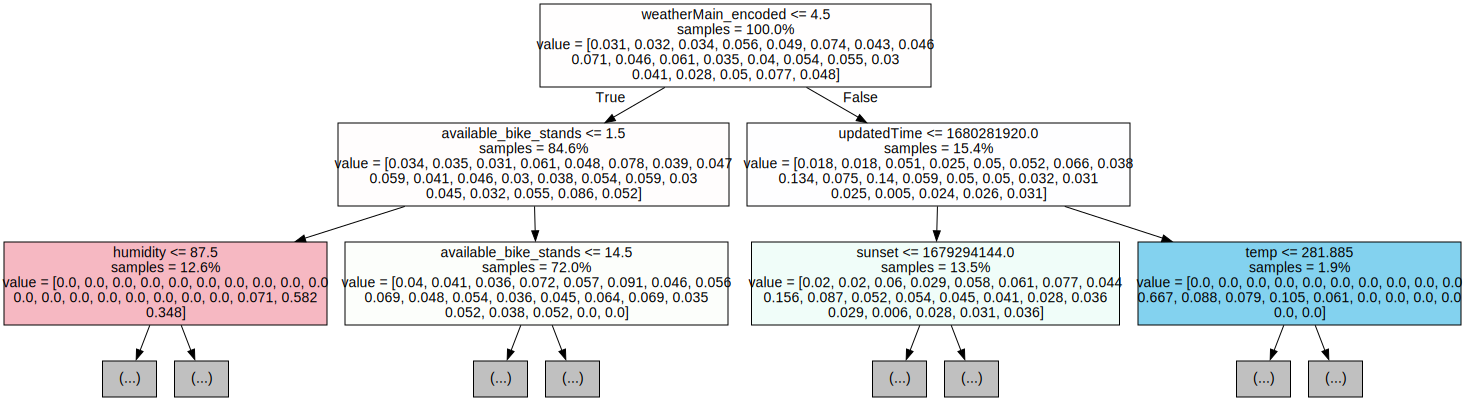

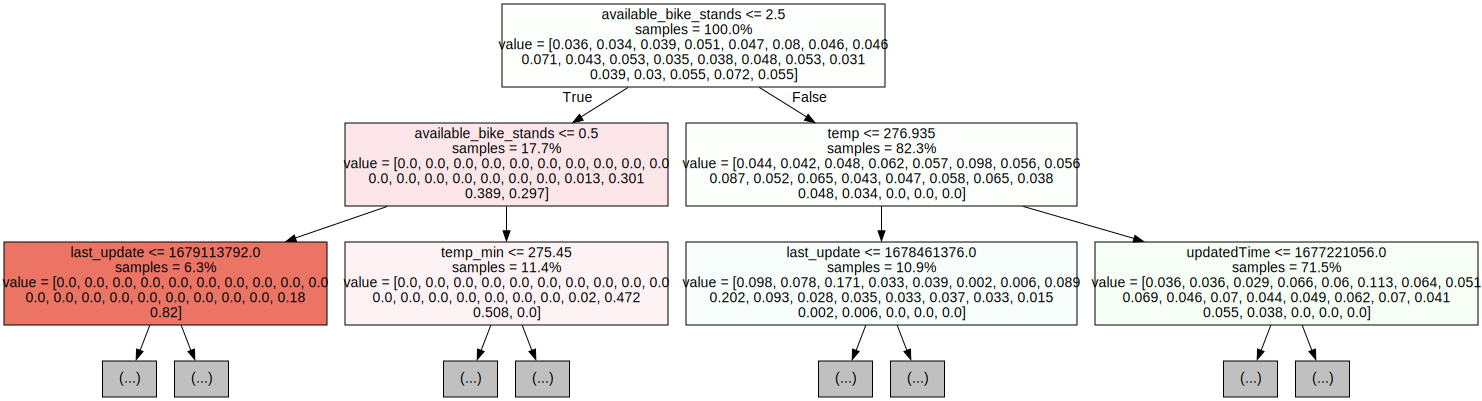

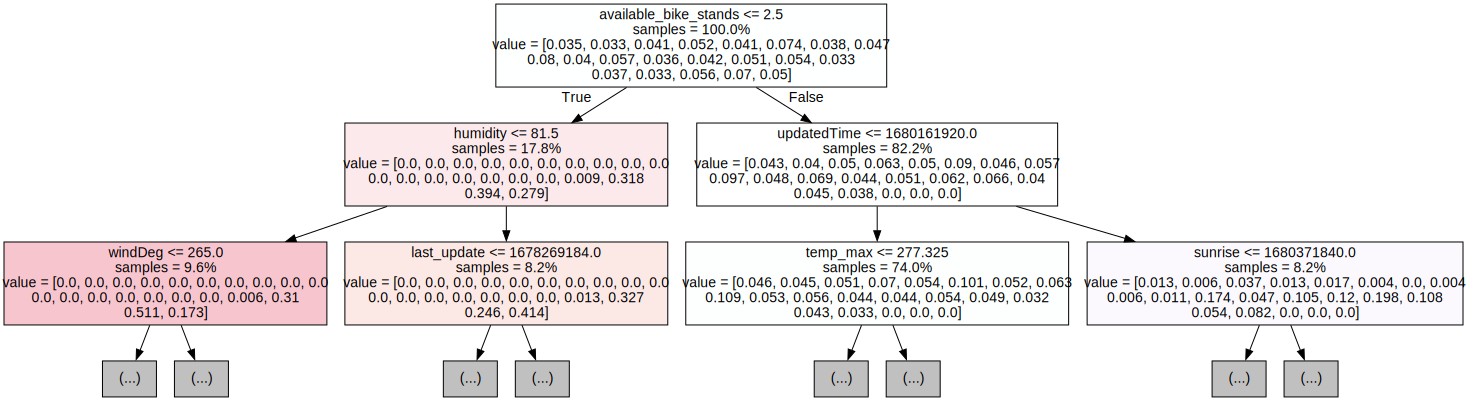

In [31]:

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train_data_4.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [33]:
# setting hyperparameters 
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train_data_4, Y_train_data_4)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fe47b3b2410>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fe47b3b21d0>})

In [34]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 11, 'n_estimators': 51}


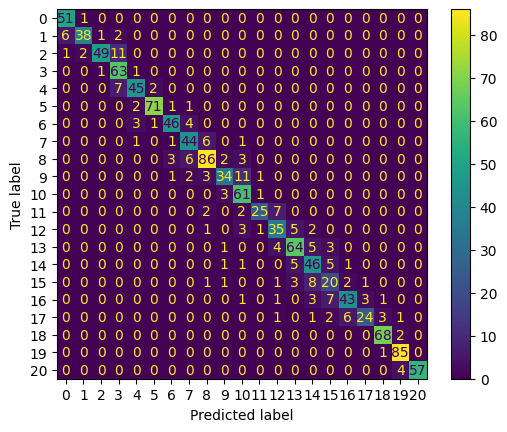

In [40]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test_data_4)

# Create the confusion matrix TARGET FEATURE 
cm = confusion_matrix(Y_test_data_4, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

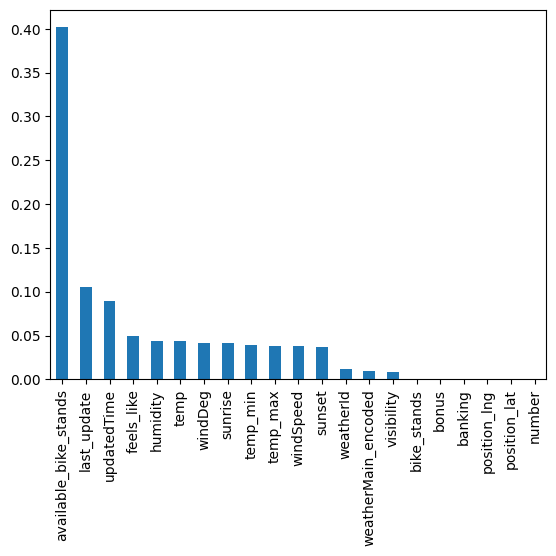

In [44]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train_data_4.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();